In [76]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import recall_score

In [29]:
trees_df = pd.read_csv('covtype.csv')
target_feature = "Cover_Type"
non_categorial_features = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]

In [54]:
len(non_categorial_features)

10

In [20]:
trees_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


<Axes: xlabel='Cover_Type', ylabel='Count'>

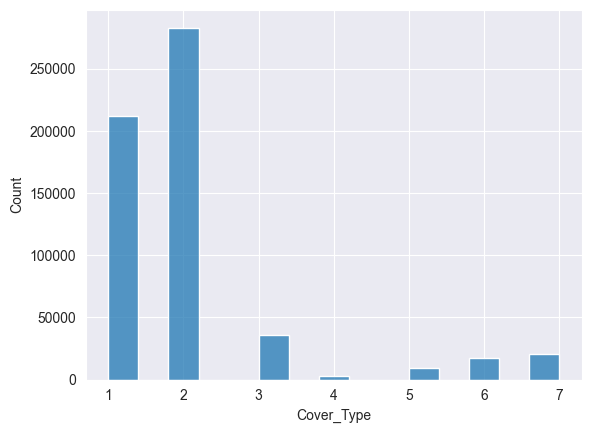

In [44]:
sns.histplot(data=trees_df, x=target_feature, binwidth=0.4)

In [45]:
trees_df[target_feature].value_counts()

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64

In [52]:
trees_df.columns.size

55

In [50]:
trees_df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [21]:
correlations = trees_df.corr()
correlations

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


In [22]:
correlations[target_feature].sort_values(ascending=False)

Cover_Type                            1.000000
Wilderness_Area4                      0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Slope                                 0.148285
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Vertical_Distance_To_Hydrology        0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Wilderness_Area3                      0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13  

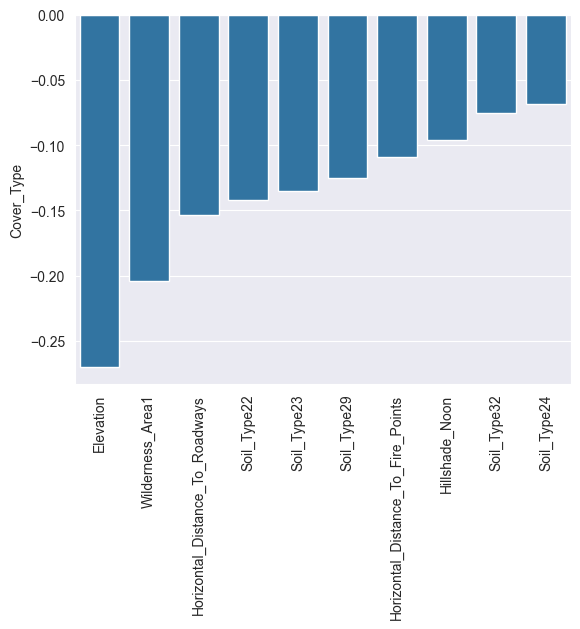

In [23]:
sns.barplot(correlations[target_feature].sort_values(ascending=True).head(10))
plt.xticks(fontsize=10, rotation=90)
plt.savefig("./images/top_negative_correlations.png")
plt.show()

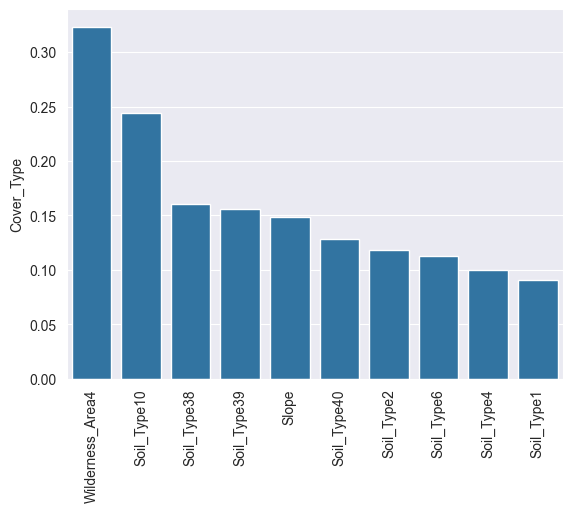

In [24]:
sns.barplot(correlations[target_feature].sort_values(ascending=False).drop(target_feature).head(10))
plt.xticks(fontsize=10, rotation=90)
plt.savefig("./images/top_positive_correlations.png")
plt.show()

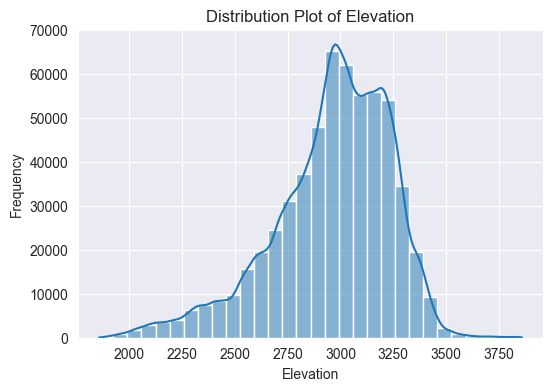

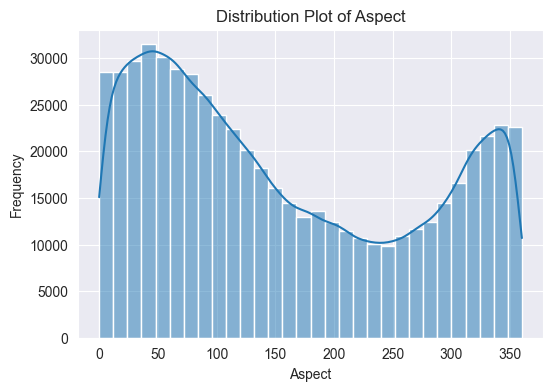

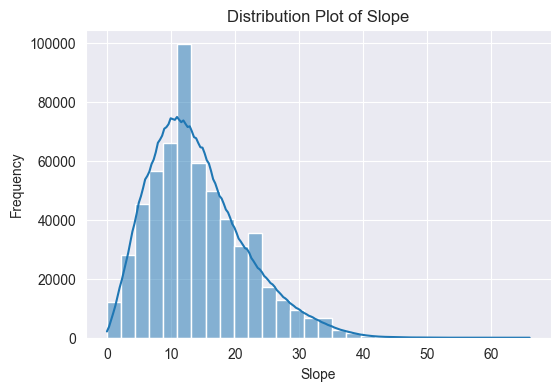

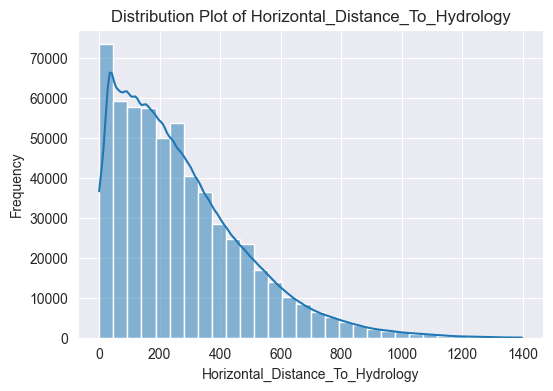

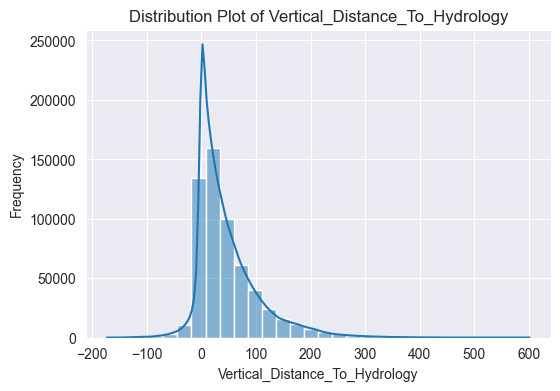

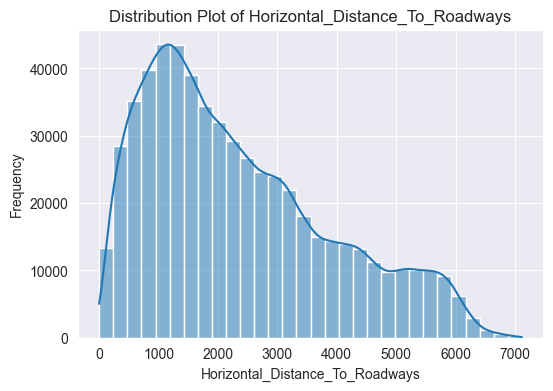

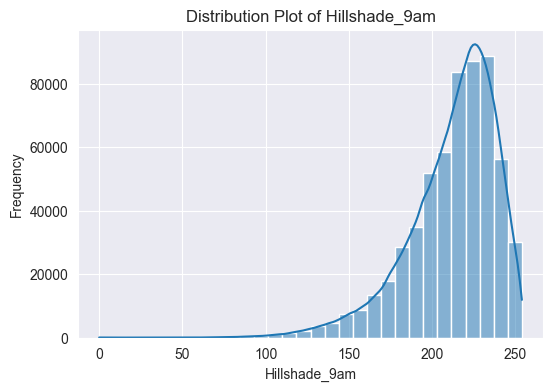

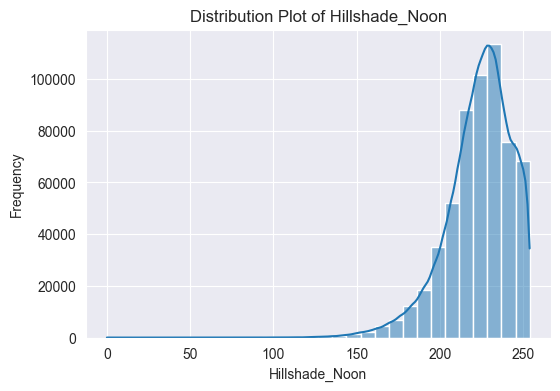

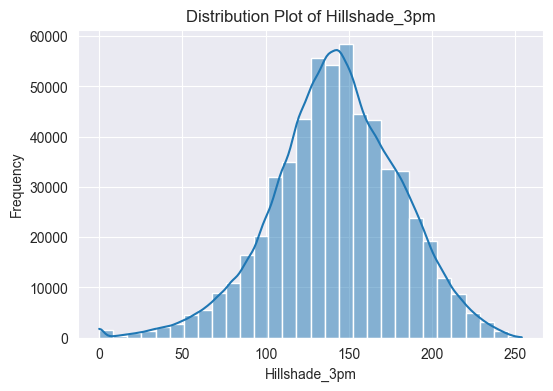

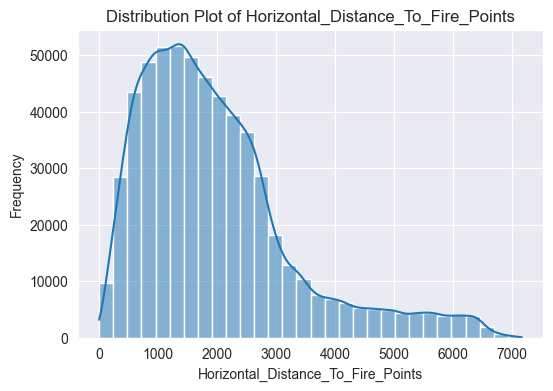

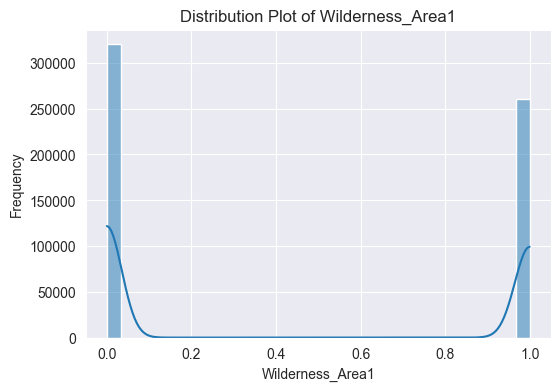

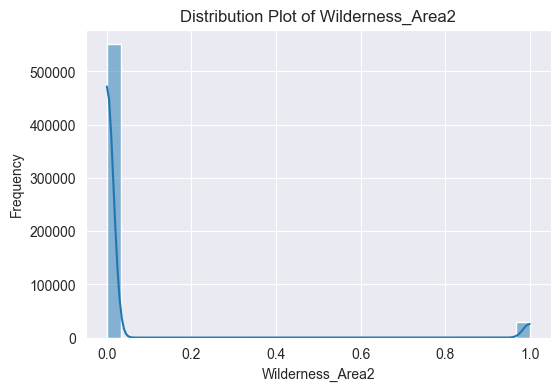

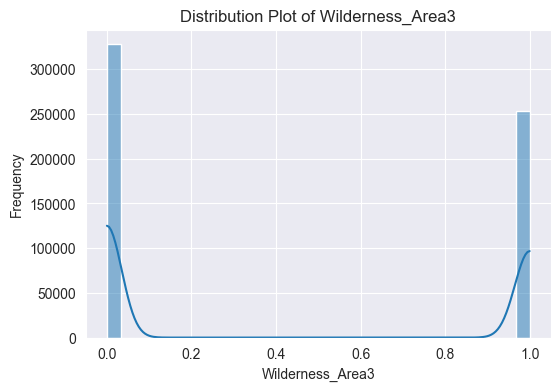

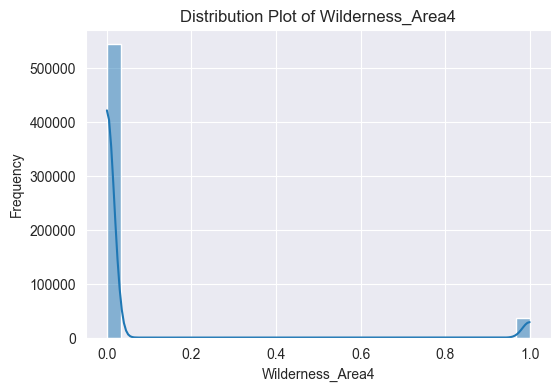

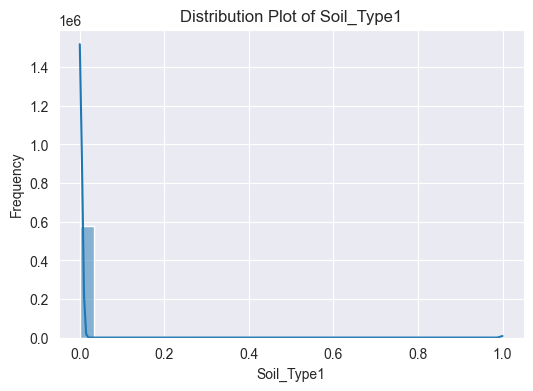

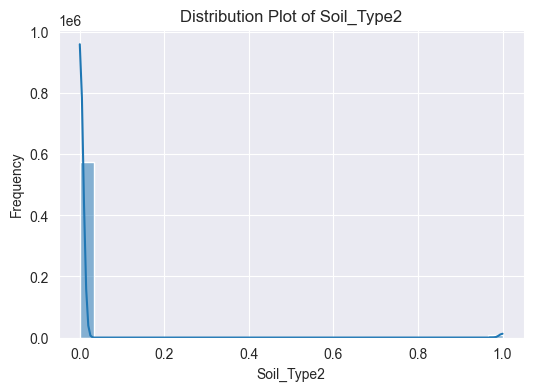

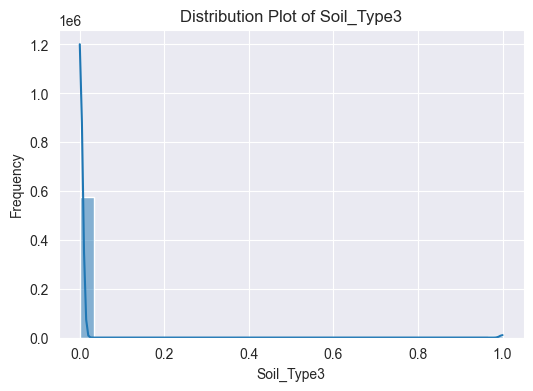

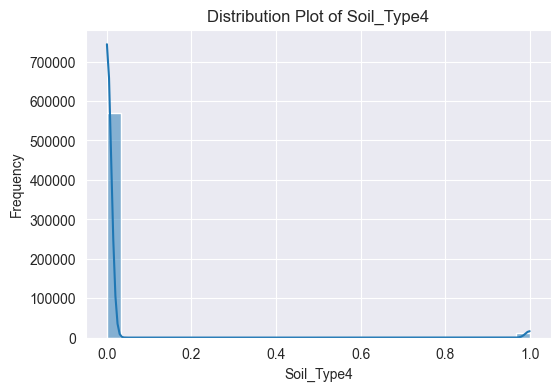

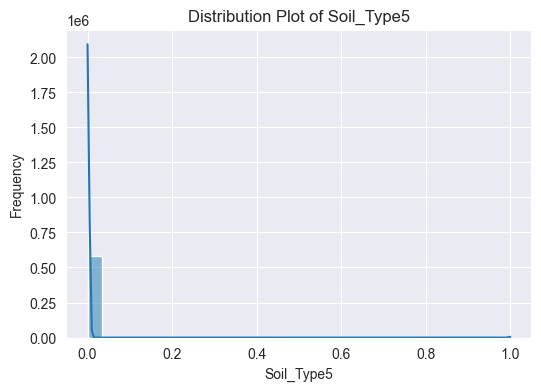

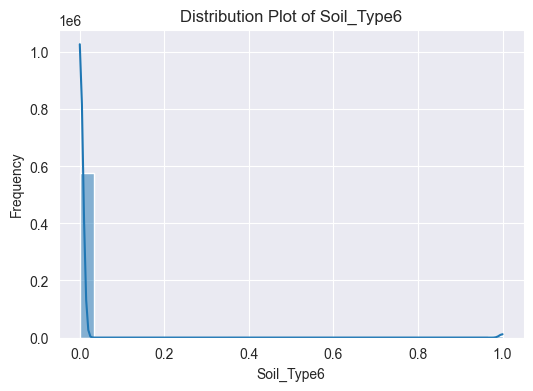

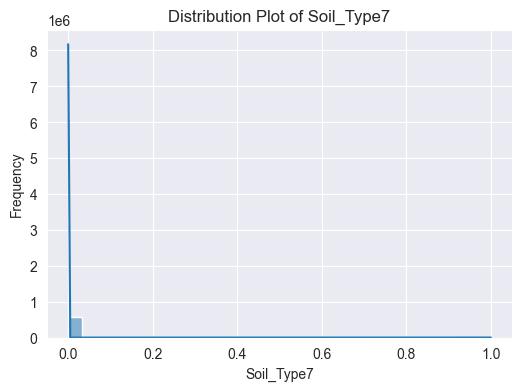

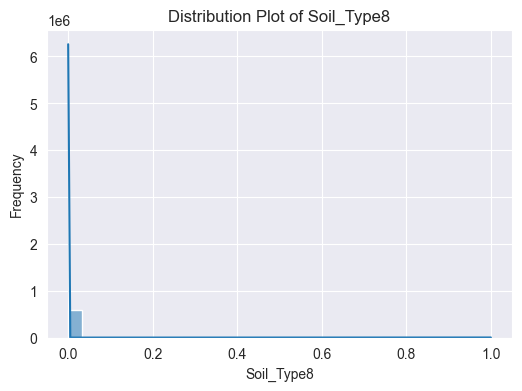

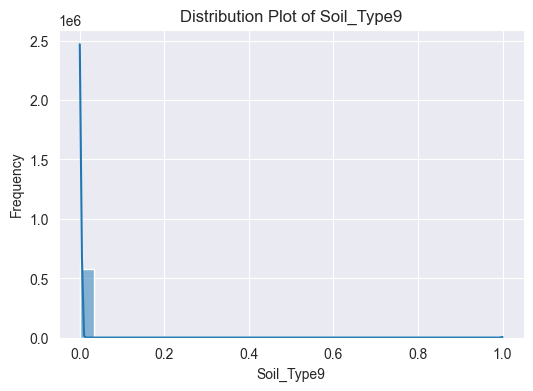

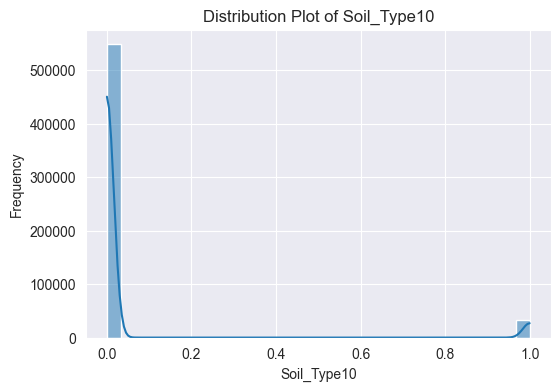

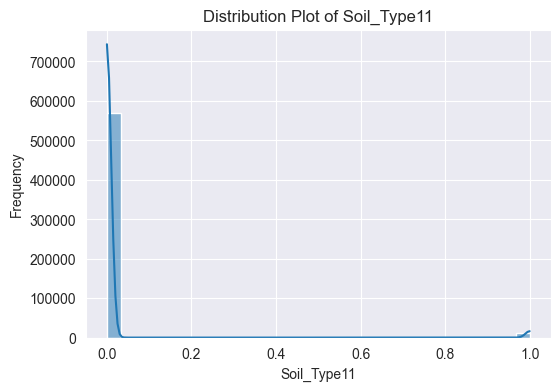

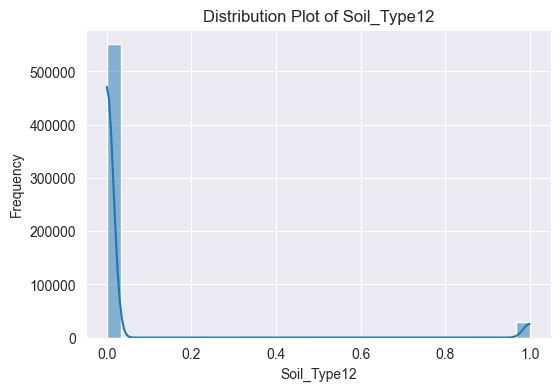

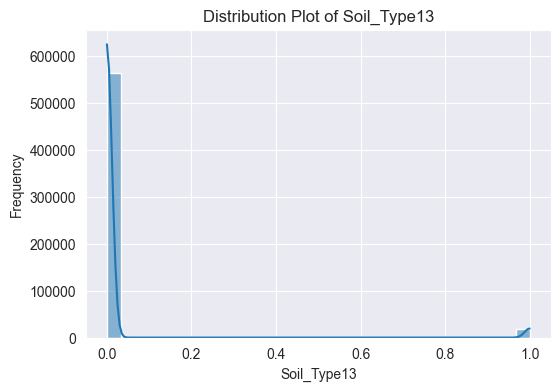

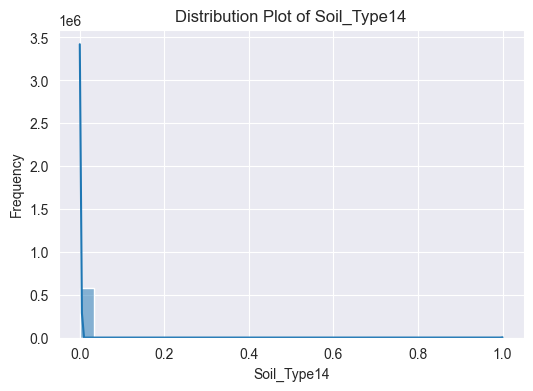

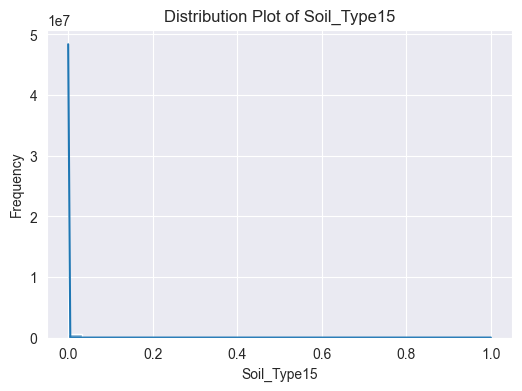

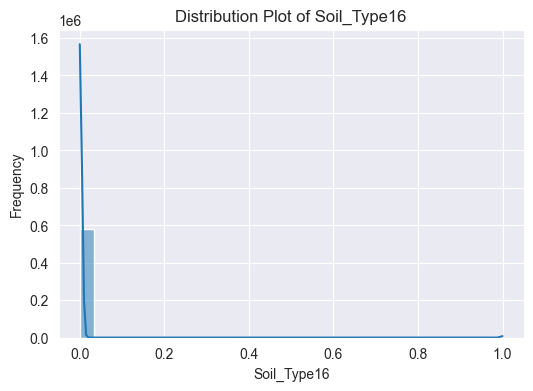

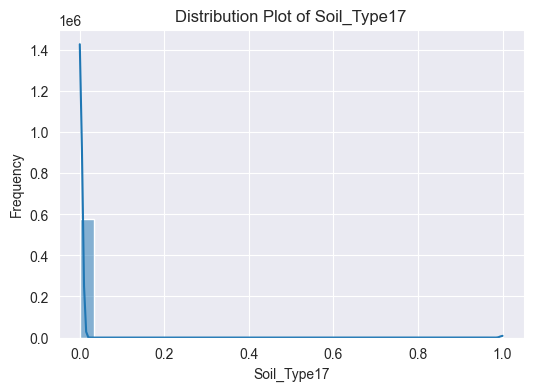

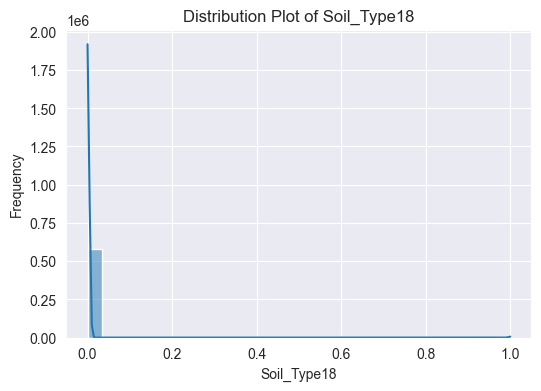

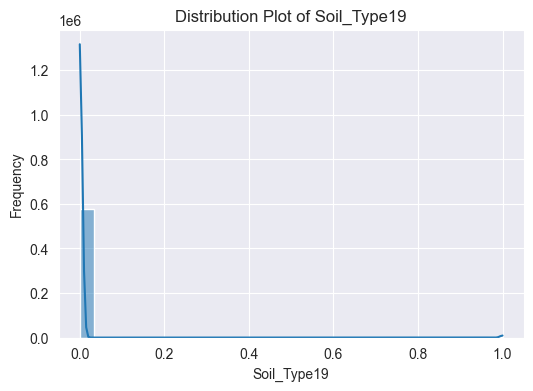

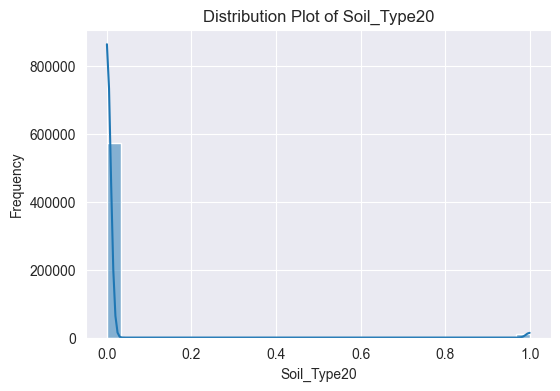

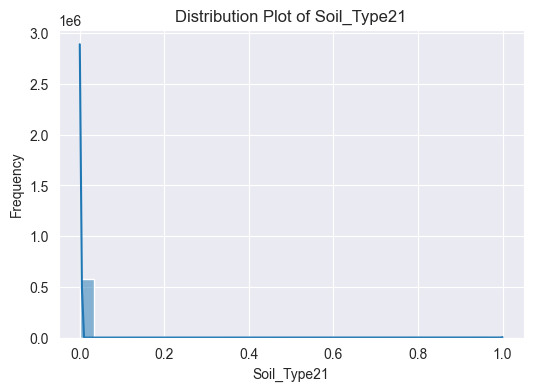

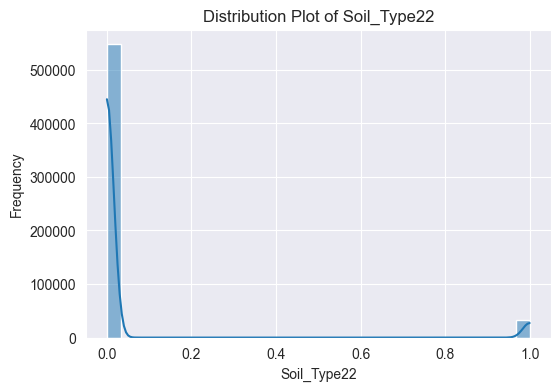

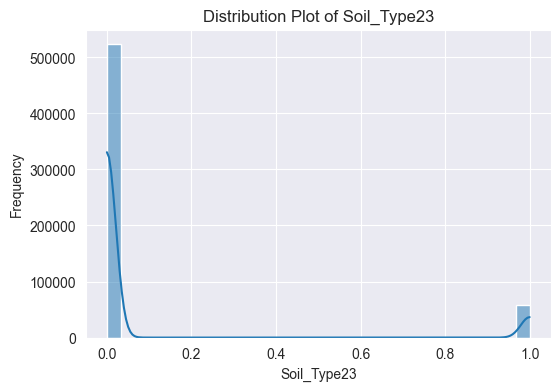

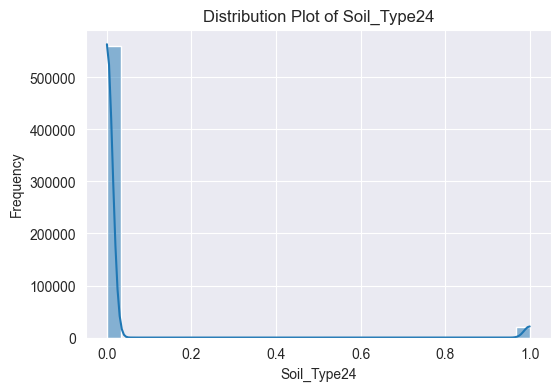

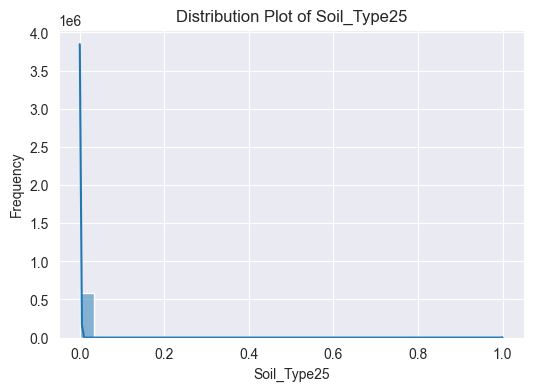

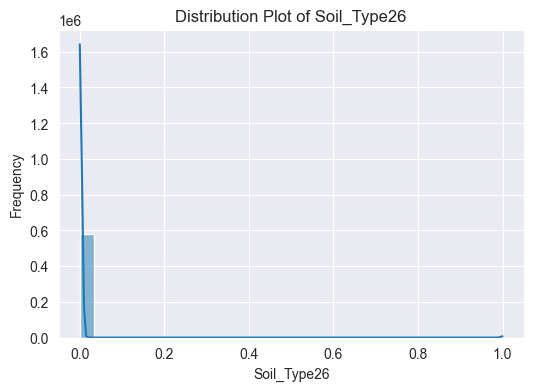

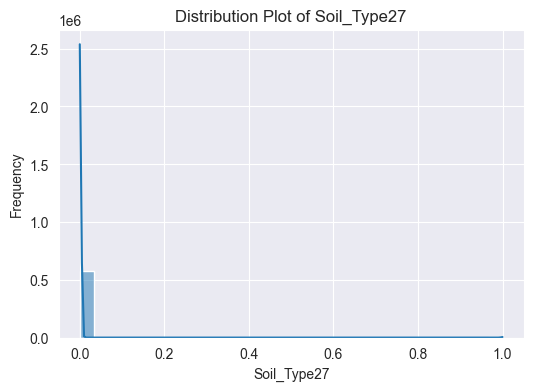

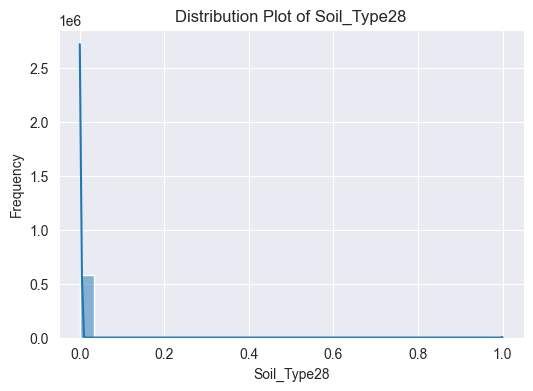

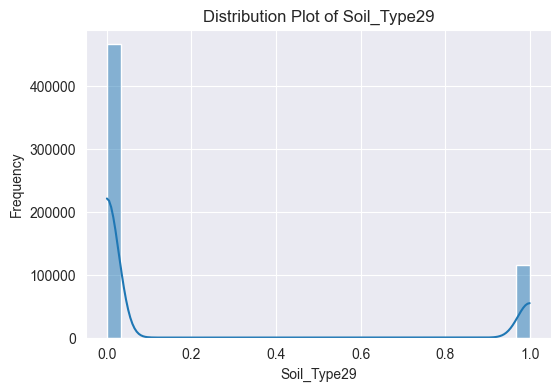

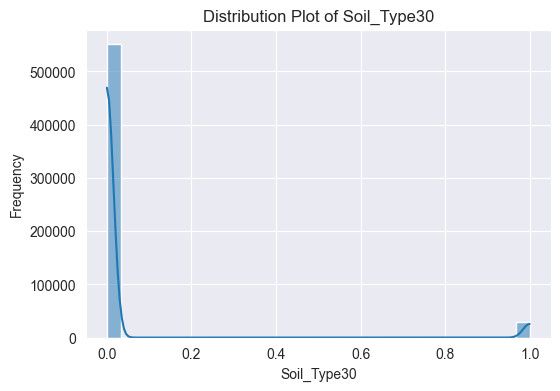

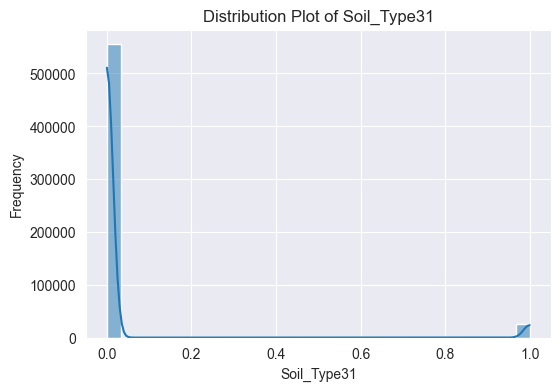

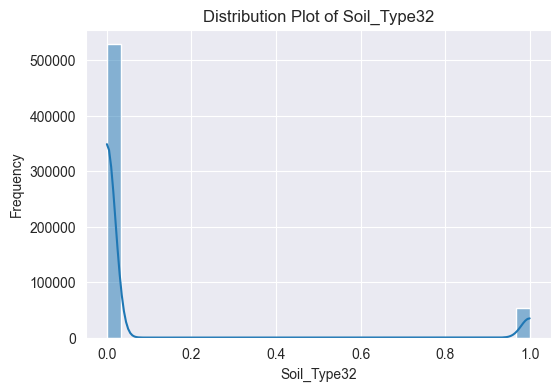

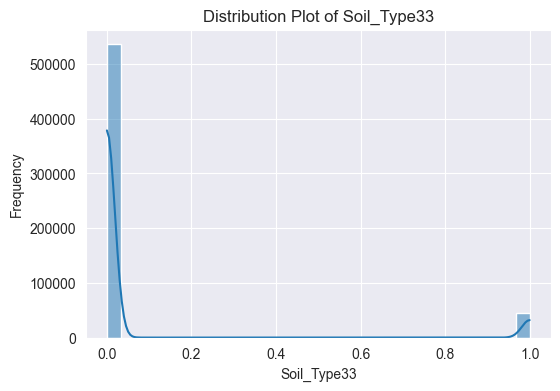

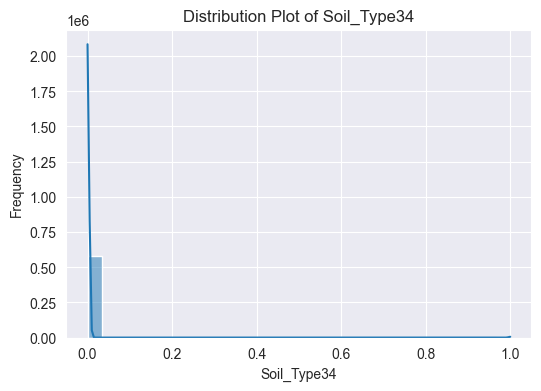

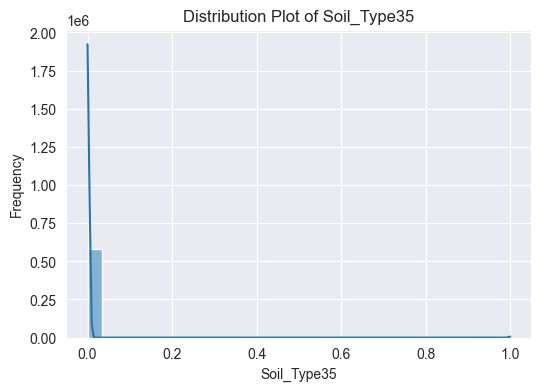

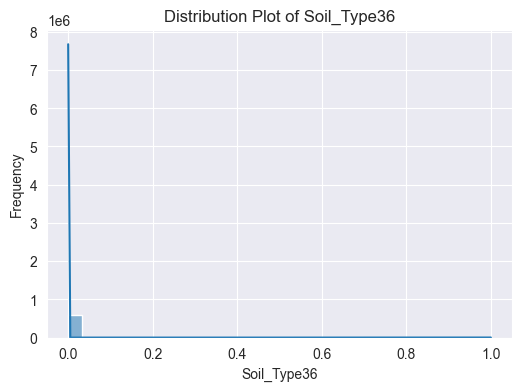

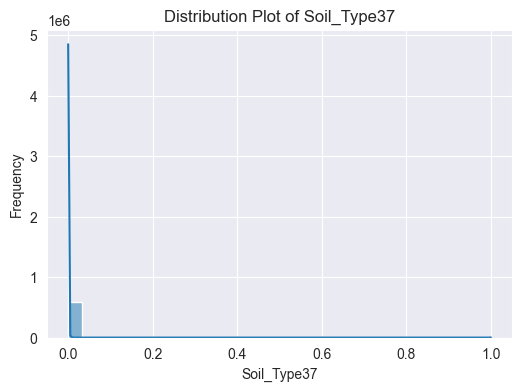

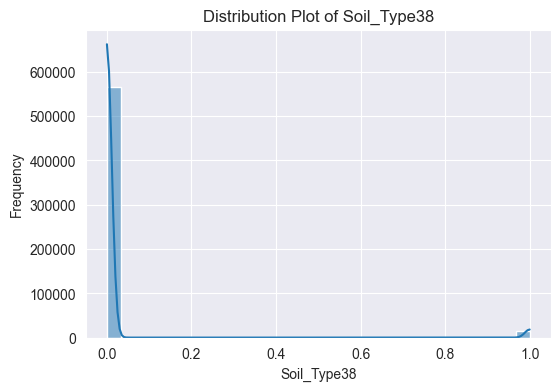

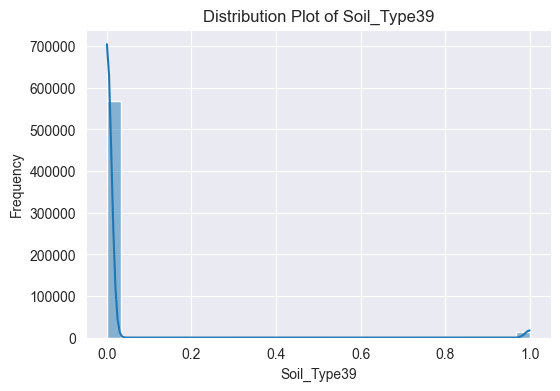

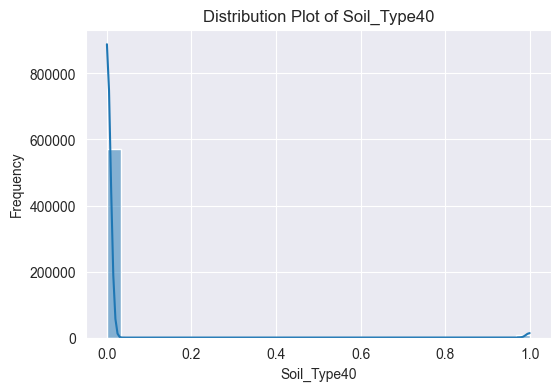

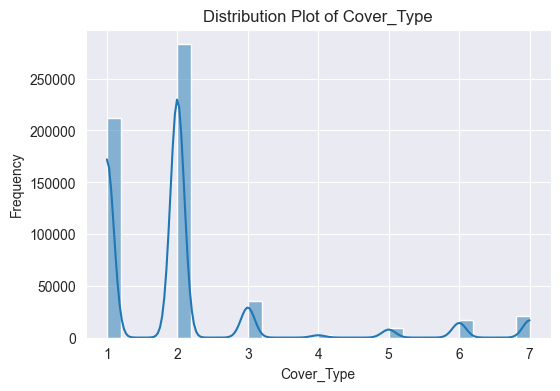

In [25]:
for column in trees_df.columns:
    if pd.api.types.is_numeric_dtype(trees_df[column]):
        plt.figure(figsize=(6, 4))
        sns.histplot(trees_df[column], kde=True, bins=30)
        plt.title(f"Distribution Plot of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

Spearman Correlation Matrix:
                                    Elevation    Aspect     Slope  \
Elevation                            1.000000  0.044060 -0.160297   
Aspect                               0.044060  1.000000  0.072005   
Slope                               -0.160297  0.072005  1.000000   
Horizontal_Distance_To_Hydrology     0.287402  0.004692  0.019206   
Vertical_Distance_To_Hydrology       0.086931  0.073052  0.301333   
Horizontal_Distance_To_Roadways      0.341590  0.019418 -0.205023   
Hillshade_9am                        0.015100 -0.428957 -0.131244   
Hillshade_Noon                       0.150427  0.421134 -0.434180   
Hillshade_3pm                        0.072750  0.640536 -0.173474   
Horizontal_Distance_To_Fire_Points   0.154851 -0.112724 -0.169574   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.287402   
Aspect                                                      0.00469

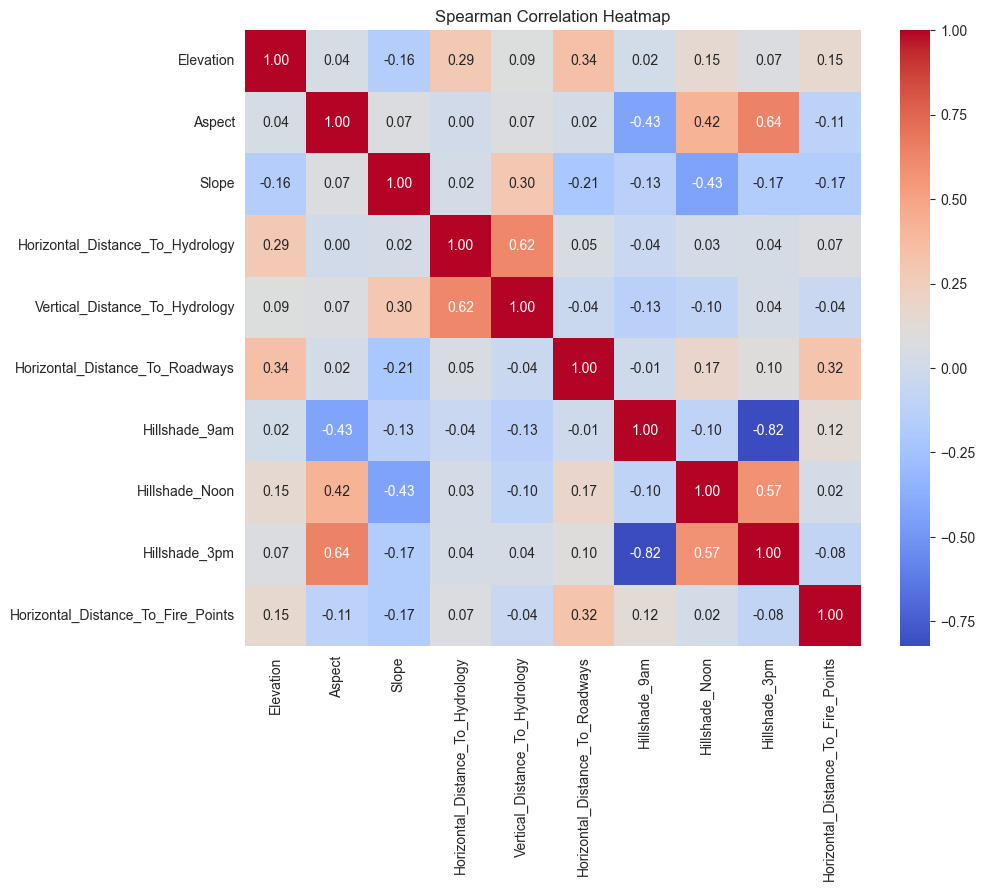

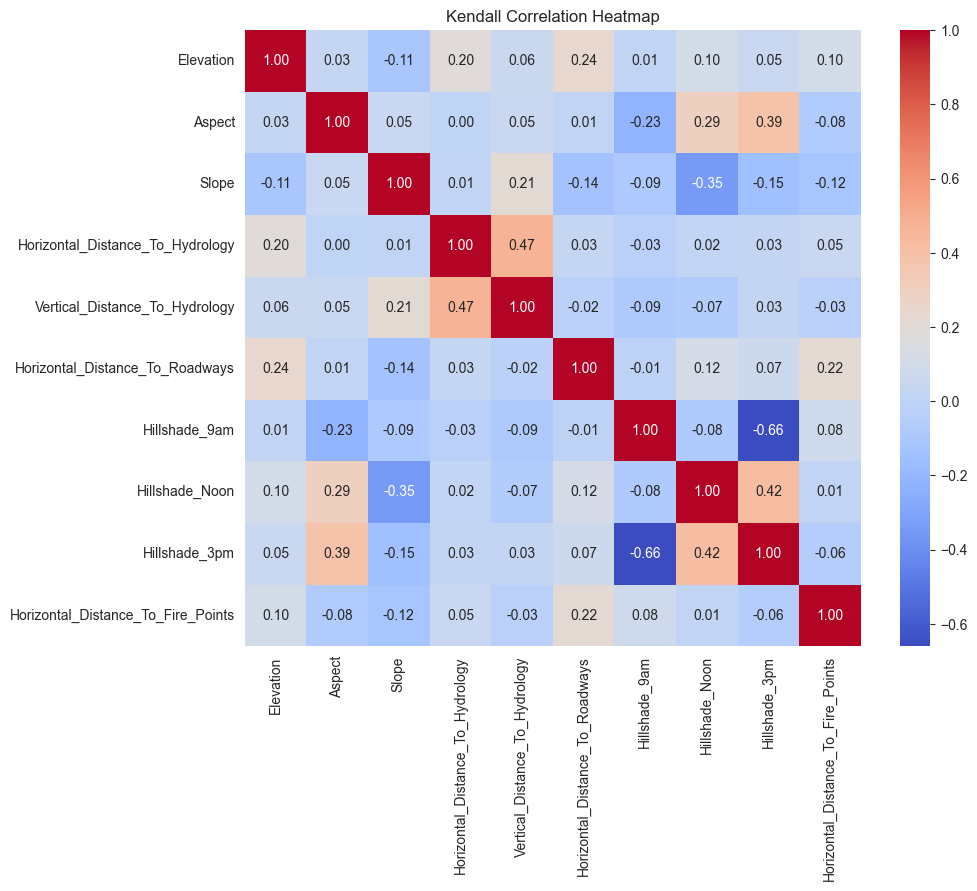

In [55]:
spearman_corr = trees_df[non_categorial_features].corr(method='spearman')
print("Spearman Correlation Matrix:")
print(spearman_corr)

kendall_corr = trees_df[non_categorial_features].corr(method='kendall')
print("Kendall Correlation Matrix:")
print(kendall_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Spearman Correlation Heatmap")
plt.savefig("./images/spearman_heatmap.png")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Kendall Correlation Heatmap")
plt.savefig("./images/kendall_heatmap.png")
plt.show()

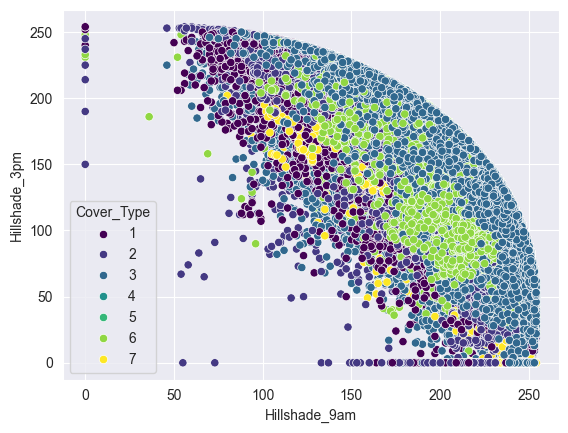

In [60]:
sns.scatterplot(data=trees_df, x="Hillshade_9am", y="Hillshade_3pm", hue=target_feature, palette="viridis")
plt.savefig("./images/scatterplot_hillshade.png")
plt.show()

In [72]:
X = trees_df.drop(target_feature, axis=1)
y = trees_df[target_feature]

skf = StratifiedKFold(n_splits=5, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy', n_jobs=-1)
print(scores.mean())

0.9686684597608186


In [75]:
X = trees_df.drop(target_feature, axis=1)
y = trees_df[target_feature]

skf = StratifiedKFold(n_splits=5, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

scores = cross_val_score(knn, X, y, cv=skf, scoring='balanced_accuracy', n_jobs=-1)
print(scores.mean())

0.9272909870807178


In [77]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

all_class_recalls = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Get recall per class (aka accuracy per class)
    recalls = recall_score(y_test, y_pred, average=None, labels=np.unique(y))
    all_class_recalls.append(recalls)

# Convert to NumPy array and compute average recall per class
all_class_recalls = np.array(all_class_recalls)
mean_recalls = all_class_recalls.mean(axis=0)

# Print results
for cls, recall in zip(np.unique(y), mean_recalls):
    print(f"Class {cls} recall (accuracy): {recall:.4f}")


Class 1 recall (accuracy): 0.9684
Class 2 recall (accuracy): 0.9760
Class 3 recall (accuracy): 0.9690
Class 4 recall (accuracy): 0.7962
Class 5 recall (accuracy): 0.8909
Class 6 recall (accuracy): 0.9307
Class 7 recall (accuracy): 0.9698


In [83]:
X = trees_df.drop(target_feature, axis=1)
y = trees_df[target_feature]

skf = StratifiedKFold(n_splits=5, shuffle=True)
unique_classes = np.unique(y)

results = {}
overall_accuracies = {}

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
    all_class_recalls = []
    fold_accuracies = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        recalls = recall_score(y_test, y_pred, average=None, labels=unique_classes)
        all_class_recalls.append(recalls)

        acc = accuracy_score(y_test, y_pred)
        fold_accuracies.append(acc)

    results[k] = np.mean(all_class_recalls, axis=0)
    overall_accuracies[k] = np.mean(fold_accuracies)

results_df = pd.DataFrame(results, index=[f'Class {c}' for c in unique_classes]).T

overall_accuracy_series = pd.Series(overall_accuracies, name='Overall Accuracy')

final_df = results_df.copy()
final_df['Overall Accuracy'] = overall_accuracy_series

print(final_df)

best_k_overall = overall_accuracy_series.idxmax()
print(f"\nBest k by overall accurac3y: {best_k_overall:.0f} (Accuracy: {overall_accuracy_series[best_k_overall]:.4f})")

final_df['Mean Balanced Accuracy'] = results_df.mean(axis=1)
best_k_balanced = final_df['Mean Balanced Accuracy'].idxmax()
print(f"Best k by mean balanced accuracy: {best_k_balanced:.0f} (Score: {final_df.loc[best_k_balanced, 'Mean Balanced Accuracy']:.4f})")

     Class 1   Class 2   Class 3   Class 4   Class 5   Class 6   Class 7  \
1   0.964657  0.970720  0.964843  0.847104  0.888654  0.939713  0.961726   
2   0.989374  0.953798  0.970549  0.780856  0.801117  0.880751  0.931497   
3   0.968556  0.974864  0.968115  0.807057  0.898557  0.937353  0.967967   
4   0.984309  0.962485  0.970017  0.766654  0.833351  0.897161  0.946026   
5   0.967740  0.975951  0.967416  0.784864  0.891603  0.930212  0.968601   
6   0.980075  0.965605  0.969374  0.763379  0.843991  0.904244  0.950268   
7   0.965611  0.974811  0.966409  0.770663  0.880438  0.925779  0.966260   
8   0.975264  0.965771  0.966493  0.738626  0.835248  0.899407  0.949634   
9   0.962061  0.973032  0.963724  0.749912  0.863477  0.916969  0.961482   
10  0.970662  0.964603  0.961934  0.721878  0.825980  0.895780  0.946953   
11  0.957647  0.971384  0.961067  0.739705  0.849257  0.903495  0.957582   
12  0.966196  0.963502  0.959669  0.716052  0.817973  0.886452  0.942808   
13  0.954541

In [84]:
final_df

,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7,Overall Accuracy,Mean Balanced Accuracy
1,0.964657,0.970720,0.964843,0.847104,0.888654,0.939713,0.961726,0.964978,0.933917
2,0.989374,0.953798,0.970549,0.780856,0.801117,0.880751,0.931497,0.961517,0.901134
3,0.968556,0.974864,0.968115,0.807057,0.898557,0.937353,0.967967,0.968744,0.931781
4,0.984309,0.962485,0.970017,0.766654,0.833351,0.897161,0.946026,0.965336,0.908572
5,0.967740,0.975951,0.967416,0.784864,0.891603,0.930212,0.968601,0.968524,0.926627
6,0.980075,0.965605,0.969374,0.763379,0.843991,0.904244,0.950268,0.965794,0.910991
7,0.965611,0.974811,0.966409,0.770663,0.880438,0.925779,0.966260,0.966665,0.921425
8,0.975264,0.965771,0.966493,0.738626,0.835248,0.899407,0.949634,0.963517,0.904349
9,0.962061,0.973032,0.963724,0.749912,0.863477,0.916969,0.961482,0.963531,0.912951
10,0.970662,0.964603,0.961934,0.721878,0.825980,0.895780,0.946953,0.960555,0.898256


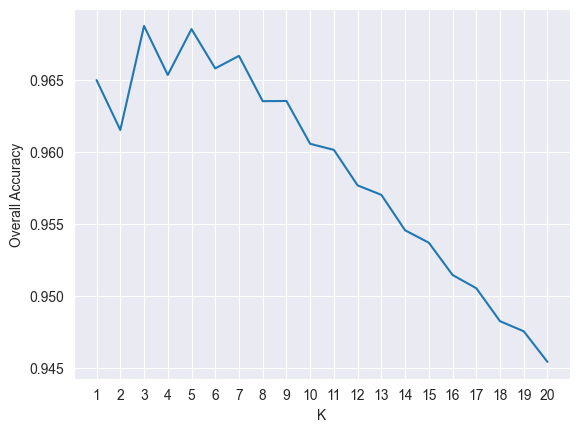

In [91]:
plt.plot(final_df['Overall Accuracy'])
plt.xlabel("K")
plt.xticks(range(1, 21))
plt.ylabel("Overall Accuracy")
plt.savefig("./images/overall_accuracy.png")
plt.show()

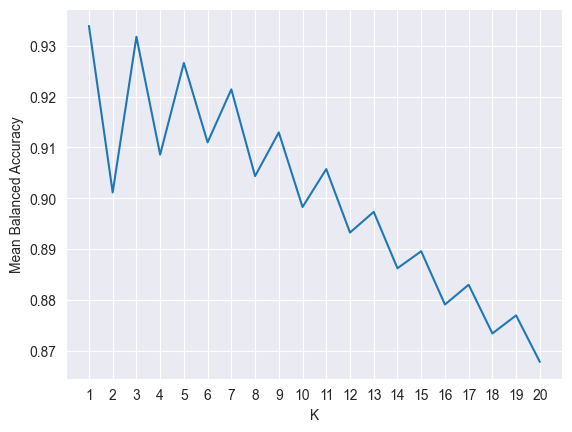

In [92]:
plt.plot(final_df['Mean Balanced Accuracy'])
plt.xlabel("K")
plt.xticks(range(1, 21))
plt.ylabel("Mean Balanced Accuracy")
plt.savefig("./images/mean_balanced_accuracy.png")
plt.show()

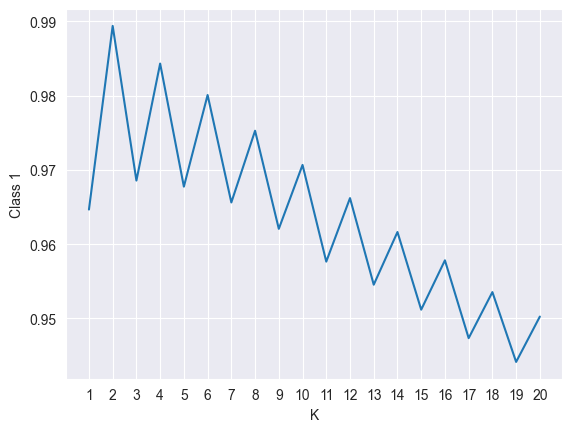

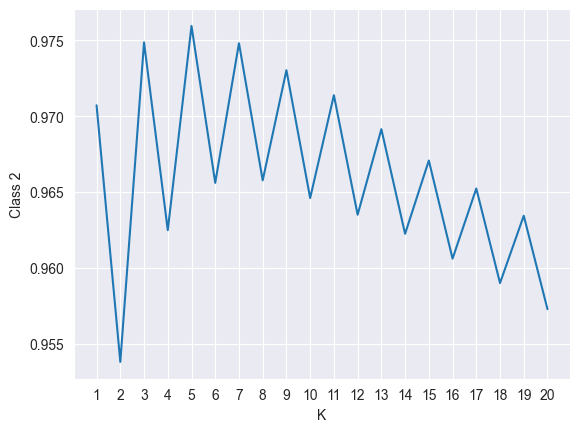

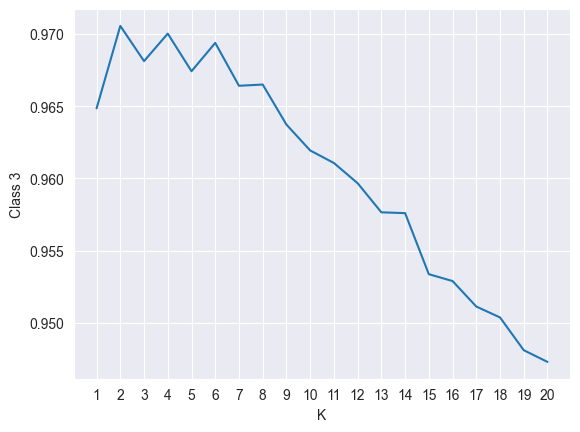

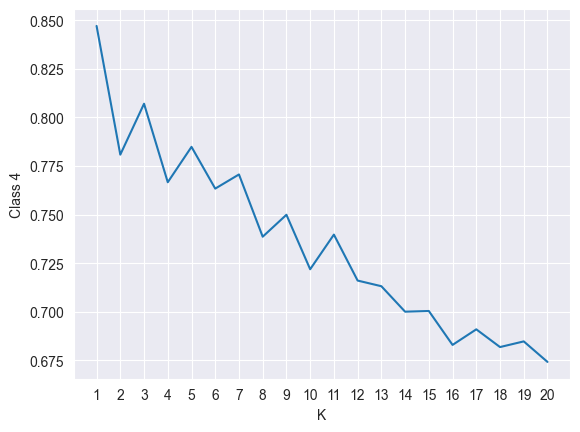

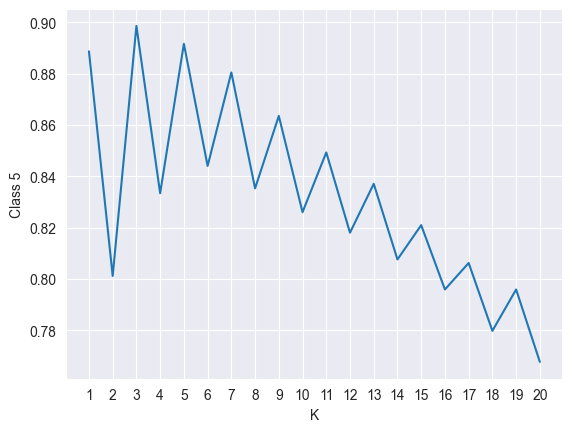

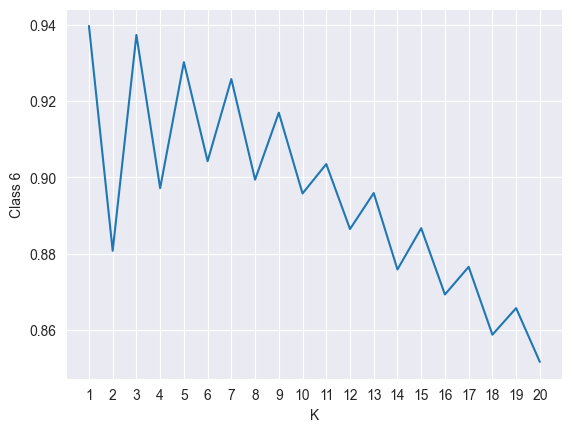

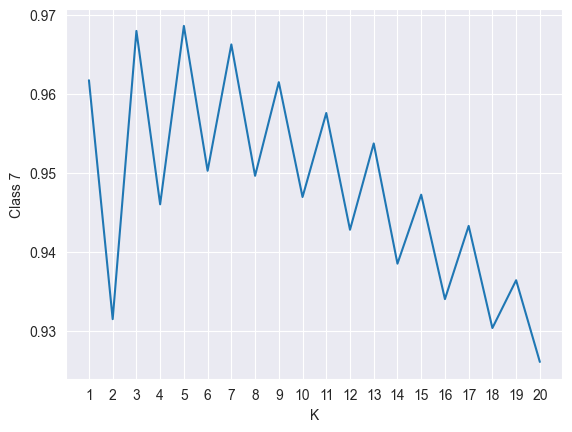

In [93]:
for i in range(1, 8):
    feature = 'Class ' + str(i)
    plt.plot(final_df[feature])
    plt.xlabel("K")
    plt.xticks(range(1, 21))
    plt.ylabel(feature)
    plt.savefig(f"./images/{feature}.png")
    plt.show()